# Projet 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## I. Traitement des données

In [3]:
# importer les 3 fichiers EXCEL

erp = pd.read_excel('Data/erp.xlsx')
liaison = pd.read_excel('Data/liaison.xlsx')
web = pd.read_excel('Data/web.xlsx')

/Users/yzhang/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/yzhang/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/yzhang/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
erp # comprendre rapidement a quoi se ressemble les donnees dans ERP

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [5]:
erp.info() # comprendre rapidement les types des donnees dans le fichier ERP et s'il y a des valeurs nulles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [6]:
len(erp['product_id'].unique()) # Tester si product_id est unique

825

In [7]:
len(erp) # Resultat de teste, donc nous pouvons l'utiliser en primary key pour la jointure de donnees

825

In [8]:
web # comprendre rapidement a quoi se ressemble les donnees dans WEB

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [9]:
web.info() # comprendre rapidement les types des donnees dans le fichier WEB et s'il y a des valeurs nulles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [10]:
len(web['sku'].unique())  # Tester si sku est unique

715

In [11]:
len(web) 

1513

In [15]:
web.duplicated(subset=['sku']) # resultat montre il y a des doublons pour sku

0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Length: 1513, dtype: bool

In [17]:
web.loc[web ['sku'] == 15298,:] # nous regardons dans le detail des doublons, par exemple pour le produit 15298
# dans le colonne post_type : 1 ligne consiste en produit
# dans le colonne post_type : 1 ligne consiste en attachment

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [18]:
web.drop_duplicates(subset=['sku'], inplace=True, ignore_index=True) # nous supprimer les doublons des produits
# sku est devenue une valeur unique pour etre primary key

In [19]:
liaison # comprendre rapidement a quoi se ressemble les donnees dans liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [20]:
liaison.info() # Il y a des valeurs nulles dans id_web

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [21]:
liaison = liaison.dropna() # nous supprimons les valeurs nulles

In [22]:
liaison.info() # Les valeurs nulles ont été bien supprimées : 734 lignes au lieu de 825 lignes d'origine

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [23]:
# Creation d'une nouvelle data frame qui inclut toutes informations des 3 fichiers excel
data = erp.merge(liaison, left_on='product_id', right_on='product_id').merge(web, left_on='id_web', right_on='sku')

In [ ]:
# Creation d'une nouvelle colonne CA dans le data frame
data['ca'] = data['price']*data['total_sales']

## II. Analyse des données

## 1. le total du chiffre d’affaires réalisé en ligne.

70568.6


In [24]:
data['ca'].sum()


70568.6

## 2. le chiffre d’affaires par produit

In [25]:
data.groupby(['product_id'])['ca'].sum()

product_id
3847    145.2
3849      0.0
3850      0.0
4032     42.3
4039      0.0
        ...  
6930     42.0
7023      0.0
7025      0.0
7247      0.0
7338      0.0
Name: ca, Length: 714, dtype: float64

## 3. Analyse sur le prix afin de détecter d’éventuelles valeurs aberrantes

D'après les analyses de dispersion, j'ai constaté que les prix plus de 84 euros seraint probablement aberrants, qui concerne 32 produits. Ci-dessous une graphique de boxplot pour illustrer et une liste de ces 32 produits.

In [26]:
data.describe() # D'un premier regard s'il y a des anomalies dans Price, pas de prix negatif par exemple.

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,ca
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,98.835574
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,307.685071
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,15.250000
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,91.150000
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4704.000000


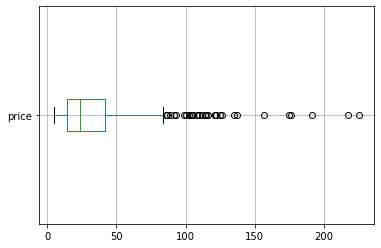

In [27]:
# utiliser Skewed distribution pour détecter les anomalies potentiels
# Use Inter-Quartile Range (IQR) proximity rule.
# The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.
#where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

data.boxplot(column="price", vert=False)
plt.show()

In [28]:
Q1 = np.percentile(data['price'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['price'], 75, interpolation = 'midpoint')
  
outlier = Q3+1.5*(Q3-Q1)
print(outlier)

84.22500000000001


In [29]:
data.loc[data['price']>84]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,ca
63,4115,1,100.0,11,instock,15382,15382,0,0,0,...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
65,4132,1,88.4,5,instock,11668,11668,0,0,0,...,2020-02-20 09:55:02,2020-02-20 08:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
199,4352,1,225.0,0,outofstock,15940,15940,0,0,0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
201,4355,1,126.5,2,instock,12589,12589,0,0,0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
205,4359,1,85.6,0,outofstock,13853,13853,0,0,0,...,2019-12-23 09:30:11,2019-12-23 08:30:11,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6
218,4402,1,176.0,8,instock,3510,3510,0,0,0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
219,4404,1,108.5,2,instock,3507,3507,0,0,0,...,2020-08-12 09:30:16,2020-08-12 07:30:16,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0
221,4406,1,157.0,3,instock,7819,7819,0,0,0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
222,4407,1,104.0,6,instock,3509,3509,0,0,0,...,2020-07-04 09:45:03,2020-07-04 07:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0
227,4582,1,109.6,7,instock,12857,12857,0,0,0,...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
